# Week 1

#### The following notes and experimentations may be a little disorganized using as a place to remember and organize later

# ordinary differential equations (ODE)

An equation that describes how a function changes with respect to one variable, typically time. It expresses the relationship between a function and its derivative, defining how a system evolves over time.

### Trajectory is a solution to an ODE

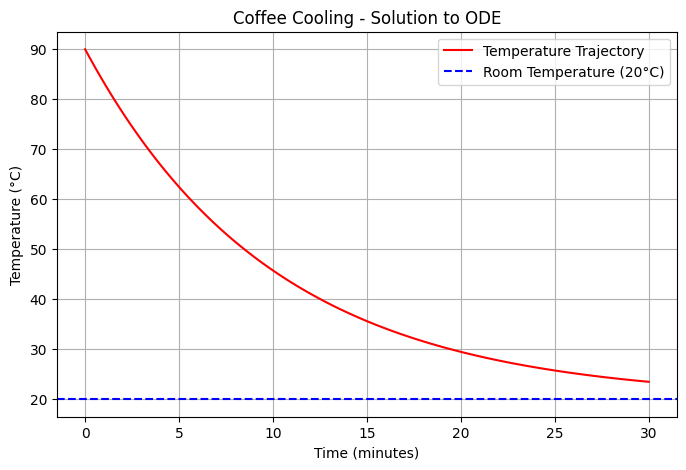

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
T_room = 20  # Room temperature (°C)
x0 = 90      # Initial coffee temperature (°C)
beta = 0.1   # Cooling rate

# Time range (in minutes)
t = np.linspace(0, 30, 100)  # 0 to 30 minutes

# Compute temperature over time using the ODE solution
x_t = T_room + (x0 - T_room) * np.exp(-beta * t)

# Plot the trajectory
plt.figure(figsize=(8,5))
plt.plot(t, x_t, label="Temperature Trajectory", color="red")
plt.axhline(y=T_room, color="blue", linestyle="--", label="Room Temperature (20°C)")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Coffee Cooling - Solution to ODE")
plt.legend()
plt.grid()
plt.show()

# Summary of Key Concepts

| Concept        | Coffee Cooling Example                              | Diffusion Model Equivalent  |
|---------------|-------------------------------------------------|-----------------------------|
| **ODE**       | $ \frac{dx}{dt} = -\beta (x - T_{\text{room}}) $ governs how coffee cools | ODE governs how data transforms |
| **Solution**  | $ x(t) = 20 + 70 e^{-0.1t} $ describes temperature at any time | Defines how noise is added or removed |
| **Trajectory** | The red curve showing how coffee cools over time | Data evolving through noise |
| **Exponential Decay** | $ e^{-0.1t} $ causes the temperature to drop | Noise follows similar decay |


### Every ODE is defined by a Vector field (u)

example:

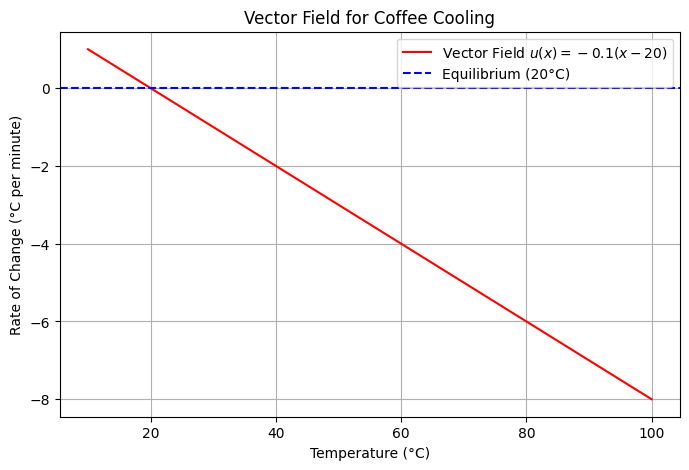

In [2]:
# Define temperature range
x = np.linspace(10, 100, 100)  # Temperature from 10°C to 100°C
beta = 0.1
T_room = 20

# Compute vector field values
u_x = -beta * (x - T_room)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, u_x, label=r"Vector Field $u(x) = -0.1(x - 20)$", color="red")
plt.axhline(y=0, color="blue", linestyle="--", label="Equilibrium (20°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rate of Change (°C per minute)")
plt.title("Vector Field for Coffee Cooling")
plt.legend()
plt.grid()
plt.show()

The vector field u(x) tells us how fast the system changes at every state.

The trajectory is the actual path followed over time.

In diffusion models, vector fields guide how noise is added and removed to transform data.

#### Function flow describes how a system evolves over time when following a vector field. Given an initial condition x0, the function flow defines a mapping that tells us where x(t) moves as time progresses.

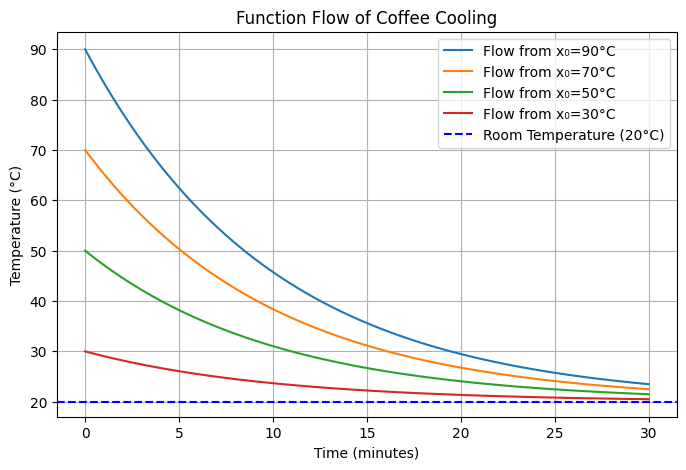

In [3]:
# Given values
beta = 0.1
T_room = 20
times = np.linspace(0, 30, 100)  # Time from 0 to 30 minutes
initial_temps = [90, 70, 50, 30]  # Different starting temperatures

# Plot function flow for each initial temperature
plt.figure(figsize=(8,5))
for x0 in initial_temps:
    x_t = T_room + (x0 - T_room) * np.exp(-beta * times)
    plt.plot(times, x_t, label=f"Flow from x₀={x0}°C")

# Labels and legend
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Function Flow of Coffee Cooling")
plt.axhline(y=T_room, color="blue", linestyle="--", label="Room Temperature (20°C)")
plt.legend()
plt.grid()
plt.show()

# Step 2: Function Flow Table

Using the function flow equation:

$$
\phi_t(x_0) = 20 + (x_0 - 20)e^{-0.1t}
$$

For an initial temperature of \( x_0 = 90 \), we compute the values:

$$
\begin{array}{|c|c|}
\hline
\text{Time } t \text{ (min)} & \text{Coffee Temperature } \phi_t(90) \\
\hline
t = 0  & 90  \\
t = 5  & 20 + 70 e^{-0.5} \approx 57.4  \\
t = 10 & 20 + 70 e^{-1} \approx 45.8  \\
t = 20 & 20 + 70 e^{-2} \approx 30.6  \\
t = 30 & 20 + 70 e^{-3} \approx 24.6  \\
\hline
\end{array}
$$

- The function flow shows how the coffee **cools over time**.
- This corresponds to how diffusion models **transition data into noise**.



# diffeomorphism

A function flow like coffee cooling is a diffeomorphism because it's a smooth, invertible transformation.

In diffusion models, we use diffeomorphic mappings to transition between data and noise.

The inverse process in diffusion models (denoising) follows the same principle as reversing a diffeomorphic transformation.

# Euler Method for Population Growth and Exact Solution

### Problem: 
We are solving the population growth model where the rate of change is proportional to the population. The differential equation is given by:

$$
\frac{dP}{dt} = rP
$$

Where:
- \( P(t) \) is the population at time \( t \),
- \( r = 0.1 \) is the growth rate,
- \( P(0) = 100 \) is the initial population.

We'll compare the **Euler method** and the **exact solution** for population growth over the time interval \( t_0 = 0 \) to \( t_4 = 4 \).

### Euler Method:
The Euler method approximates the population at each step using the formula:

$$
P_{n+1} = P_n + h \cdot r \cdot P_n
$$

Where \( h = 1 \) is the time step.

Starting with \( P_0 = 100 \), we calculate the population from \( t_0 \) to \( t_4 \) with time steps of 1 unit.

#### Step-by-Step Euler Method Calculation:

At \( t_0 = 0 \), \( P_0 = 100 \):

$$
P_1 = P_0 + h \cdot r \cdot P_0 = 100 + 1 \cdot 0.1 \cdot 100 = 110
$$

At \( t_1 = 1 \), \( P_1 = 110 \):

$$
P_2 = P_1 + h \cdot r \cdot P_1 = 110 + 1 \cdot 0.1 \cdot 110 = 121
$$

At \( t_2 = 2 \), \( P_2 = 121 \):

$$
P_3 = P_2 + h \cdot r \cdot P_2 = 121 + 1 \cdot 0.1 \cdot 121 = 133.1
$$

At \( t_3 = 3 \), \( P_3 = 133.1 \):

$$
P_4 = P_3 + h \cdot r \cdot P_3 = 133.1 + 1 \cdot 0.1 \cdot 133.1 = 146.41
$$

So, the population at each time step is:

- \( P_0 = 100 \)
- \( P_1 = 110 \)
- \( P_2 = 121 \)
- \( P_3 = 133.1 \)
- \( P_4 = 146.41 \)

### Exact Solution:
The exact solution to the differential equation is:

$$
P(t) = P_0 e^{rt}
$$

Substituting \( P_0 = 100 \) and \( r = 0.1 \), we get:

$$
P(t) = 100 e^{0.1t}
$$

Now we calculate the exact population at each time step:

- \( P(0) = 100 e^{0.1 \cdot 0} = 100 \)
- \( P(1) = 100 e^{0.1 \cdot 1} \approx 110.52 \)
- \( P(2) = 100 e^{0.1 \cdot 2} \approx 121.89 \)
- \( P(3) = 100 e^{0.1 \cdot 3} \approx 134.39 \)
- \( P(4) = 100 e^{0.1 \cdot 4} \approx 148.42 \)

### Summary of Results:

| Time \( t \) | Euler Method \( P(t) \) | Exact Solution \( P(t) \) |
|--------------|-------------------------|---------------------------|
| \( t_0 = 0 \) | 100                     | 100                       |
| \( t_1 = 1 \) | 110                     | 110.52                    |
| \( t_2 = 2 \) | 121                     | 121.89                    |
| \( t_3 = 3 \) | 133.1                   | 134.39                    |
| \( t_4 = 4 \) | 146.41                  | 148.42                    |

### Analysis:
- The **Euler method** gives a good approximation to the exact solution but with a small error that grows over time.
- The exact solution shows a slightly higher population than the Euler method, but the difference is minimal for small time steps.


## Euler-Maruyama Method (for SDEs)
- Used for **stochastic differential equations (SDEs)** of the form:
  $$
  dY_t = f(Y_t, t) dt + g(Y_t, t) dW_t
  $$
  where \( dW_t \) represents a Wiener process (Brownian motion).
- The Euler-Maruyama update rule is:
  $$
  Y_{n+1} = Y_n + h f(Y_n, t_n) + \sqrt{h} g(Y_n, t_n) \xi_n
  $$
  where \( \xi_n \sim \mathcal{N}(0,1) \) is a standard normal random variable.
- This method extends Euler’s method by adding a noise term, making it suitable for modeling systems with randomness.

## Key Differences

| Feature               | Euler's Method (ODEs) | Euler-Maruyama Method (SDEs) |
|----------------------|--------------------|------------------------|
| **Equation type**    | Deterministic ODEs | Stochastic SDEs        |
| **Solution behavior** | Smooth trajectory  | Random, noisy trajectory |
| **Additional term**  | None               | Stochastic noise \( g(Y, t) dW_t \) |
| **Stability**        | Less stable for stiff ODEs | More variance due to randomness |


## Euler-Maruyama Method Example: Stock Price Simulation (GBM)

### **Step 1: Define the GBM Model**
The Stochastic Differential Equation (SDE) for **Geometric Brownian Motion**:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

The **Euler-Maruyama discretization**:

$$
S_{n+1} = S_n + h \mu S_n + \sigma S_n \sqrt{h} \xi_n
$$

where:  
- $S_n$ = stock price at time step $n$  
- $h$ = step size (e.g., 1 day if using daily prices)  
- $\mu$ = **drift rate** (average return per unit time)  
- $\sigma$ = **volatility** (standard deviation of returns)  
- $\xi_n \sim \mathcal{N}(0,1)$ is a normally distributed random variable  

---

### **Step 2: Define Sample Data**
We model a stock price starting at **$100** over 5 days with:

- $\mu = 0.05$ (5% annual drift, **daily drift** $\mu_{\text{daily}} = 0.05 / 252$)
- $\sigma = 0.2$ (20% annual volatility, **daily volatility** $\sigma_{\text{daily}} = 0.2 / \sqrt{252}$)
- **Step size** $h = 1$ (one day)
- Random noise $\xi_n$ from $\mathcal{N}(0,1)$

---

### **Step 3: Compute a Few Steps Manually**
#### **Random Values for $\xi_n$**
| Day | $\xi_n$ (random) |
|-----|------------------|
| 1   |  0.3            |
| 2   | -0.5            |
| 3   |  0.8            |
| 4   | -0.2            |
| 5   |  0.1            |

#### **Step 0: Initial Condition**
$$
S_0 = 100
$$

#### **Step 1: Compute $S_1$**
$$
S_1 = 100 + (1) \times \left(\frac{0.05}{252} \times 100\right) + \left(\frac{0.2}{\sqrt{252}} \times 100 \times 0.3\right)
$$

Approximating:

$$
S_1 = 100 + (0.000198 \times 100) + (0.0126 \times 100)
$$

$$
S_1 = 100 + 0.0198 + 1.26 = 101.28
$$

#### **Step 2: Compute $S_2$**
$$
S_2 = 101.28 + (1) \times \left(\frac{0.05}{252} \times 101.28\right) + \left(\frac{0.2}{\sqrt{252}} \times 101.28 \times (-0.5)\right)
$$

Approximating:

$$
S_2 = 101.28 + (0.000198 \times 101.28) - (0.0126 \times 101.28 \times 0.5)
$$

$$
S_2 = 101.28 + 0.020 + (-0.64) = 100.66
$$

#### **Step 3: Compute $S_3$**
Using $\xi_3 = 0.8$,

$$
S_3 = 100.66 + (1) \times \left(\frac{0.05}{252} \times 100.66\right) + \left(\frac{0.2}{\sqrt{252}} \times 100.66 \times 0.8\right)
$$

Approximating:

$$
S_3 = 100.66 + 0.020 + 1.63 = 102.31
$$

---

### **Final Results for First 5 Days**
| Day | $\xi_n$ | Computed $S_n$ |
|-----|------------|----------------|
| 0   | -         | 100.00         |
| 1   |  0.3      | 101.28         |
| 2   | -0.5      | 100.66         |
| 3   |  0.8      | 102.31         |
| 4   | -0.2      | 101.98         |
| 5   |  0.1      | 102.23         |

---

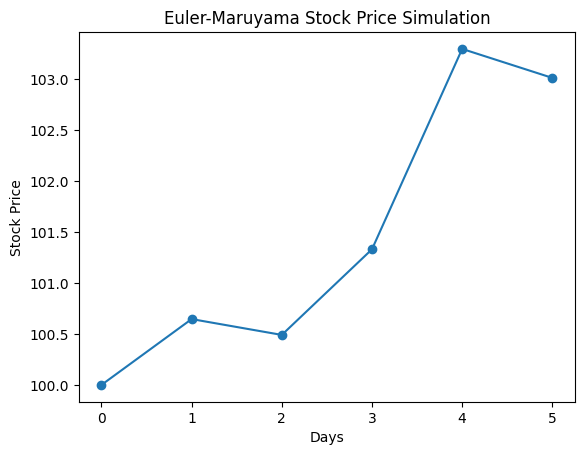

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100      # Initial stock price
mu = 0.05     # Annual drift
sigma = 0.2   # Annual volatility
T = 5         # Time horizon in days
dt = 1        # Time step (1 day)
N = int(T/dt) # Number of steps
np.random.seed(42)  # Fixing seed for reproducibility

# Convert annual values to daily
mu_daily = mu / 252
sigma_daily = sigma / np.sqrt(252)

# Simulate stock price using Euler-Maruyama
S = np.zeros(N+1)
S[0] = S0
xi = np.random.normal(0, 1, N)  # Generate random noise

for n in range(N):
    S[n+1] = S[n] + dt * mu_daily * S[n] + sigma_daily * S[n] * np.sqrt(dt) * xi[n]

# Plot results
plt.plot(range(N+1), S, marker='o', linestyle='-')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Euler-Maruyama Stock Price Simulation")
plt.show()

# Heun's Method for Population Growth

### Problem: 
We are solving the population growth model where the rate of change is proportional to the population. The differential equation is given by:

$$
\frac{dP}{dt} = rP
$$

Where:
- \( P(t) \) is the population at time \( t \),
- \( r = 0.1 \) is the growth rate,
- \( P(0) = 100 \) is the initial population.

We will use **Heun's method**, a second-order Runge-Kutta method, to approximate the population from \( t_0 = 0 \) to \( t_4 = 4 \).

### Heun's Method:
The Heun's method formula is:

$$
P_{n+1} = P_n + \frac{h}{2} \left( f(t_n, P_n) + f(t_n + h, P_n + h \cdot f(t_n, P_n)) \right)
$$

Where:
- \( h \) is the time step,
- \( f(t_n, P_n) \) is the derivative at the current point.

### Step-by-Step Calculation:

We will use:
- Initial population \( P_0 = 100 \),
- Growth rate \( r = 0.1 \),
- Time step \( h = 1 \).

#### At \( t_0 = 0 \), \( P_0 = 100 \):
- Compute \( f(t_0, P_0) = 0.1 \cdot 100 = 10 \).
- Estimate \( P_1 = P_0 + h \cdot f(t_0, P_0) = 100 + 1 \cdot 10 = 110 \).
- Compute \( f(t_1, P_1) = 0.1 \cdot 110 = 11 \).
- Apply Heun's method formula:

$$
P_1 = P_0 + \frac{1}{2} \cdot \left( f(t_0, P_0) + f(t_1, P_1) \right) = 100 + \frac{1}{2} \cdot (10 + 11) = 100 + 10.5 = 110.5
$$

#### At \( t_1 = 1 \), \( P_1 = 110.5 \):
- Compute \( f(t_1, P_1) = 0.1 \cdot 110.5 = 11.05 \).
- Estimate \( P_2 = P_1 + h \cdot f(t_1, P_1) = 110.5 + 1 \cdot 11.05 = 121.55 \).
- Compute \( f(t_2, P_2) = 0.1 \cdot 121.55 = 12.155 \).
- Apply Heun's method formula:

$$
P_2 = P_1 + \frac{1}{2} \cdot \left( f(t_1, P_1) + f(t_2, P_2) \right) = 110.5 + \frac{1}{2} \cdot (11.05 + 12.155) = 110.5 + 11.1025 = 121.6025
$$

#### Repeat the same steps for \( t_2, t_3, t_4 \):

Continue applying the same process for the next time steps:

At \( t_2 = 2 \), \( P_2 = 121.6025 \):
- Compute \( f(t_2, P_2) \),
- Estimate \( P_3 \),
- Apply Heun’s method formula.

At \( t_3 = 3 \), \( P_3 \):
- Compute \( f(t_3, P_3) \),
- Estimate \( P_4 \),
- Apply Heun’s method formula.

### Conclusion:

- **Heun’s method** provides a more accurate approximation compared to the Euler method because it uses both the beginning and the end of the time step to calculate the next value, which better captures the behavior of the differential equation.


# stochastic differential equations (SDE)

differential equations in which one or more terms are influenced by random noise, typically modeled by Wiener processes or Brownian motion, making the solution a random process. They are used to describe systems that evolve over time with inherent randomness, such as financial markets or physical processes with noise.

### side note on Brownian Motion (BM) & Geometric Brownian Motion (GBM)

| Feature               | **Brownian Motion (BM)**                  | **Geometric Brownian Motion (GBM)**         |
|-----------------------|-------------------------------------------|---------------------------------------------|
| **Drift**             | No drift, pure randomness                 | Has a drift term $ \mu $, modeling growth |
| **Modeling Use**      | Random fluctuations, no specific trend    | Asset prices, stock prices, with growth and volatility |
| **Range of Values**   | Can take negative values                  | Always positive values (due to exponential model) |
| **Mathematical Form** | $ dW(t) = \mu dt + \sigma dW(t) $       | $ dS(t) = \mu S(t) dt + \sigma S(t) dW(t) $ |
| **Real-World Example**| Random walks, Brownian motion in physics | Stock price modeling, financial modeling   |


## **Real-World Example: Stock Price Modeling with Drift and Diffusion**

One of the most common real-world applications of **drift and diffusion** is in **financial markets**, where stock prices are modeled using **Geometric Brownian Motion (GBM)**:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t.
$$

where:
- $ S_t $ is the stock price at time $ t $,
- $ \mu $ is the **drift** (expected return per unit time),
- $ \sigma $ is the **diffusion** (volatility),
- $ W_t $ is a standard Brownian motion.

---

### **Example: Apple Stock Price Projection**

Suppose:
- **Current stock price**: $ S_0 = 150 $ USD,
- **Expected annual return** ($\mu$): **8%** ($ \mu = 0.08 $),
- **Annual volatility** ($\sigma$): **20%** ($ \sigma = 0.20 $),
- **Time step**: $ dt = 1 $ year.

Applying **Itô's Lemma**, we can estimate the stock price in one year:

$$
S_{t+dt} = S_t e^{\left(\mu - \frac{1}{2} \sigma^2\right)dt + \sigma W_t}.
$$

For a **single realization**, assume $ W_t = 0.5 $ (a moderate upward fluctuation):

$$
S_1 = 150 \times e^{(0.08 - 0.5 \times 0.2^2) \times 1 + 0.2 \times 0.5}.
$$

$$
S_1 = 150 \times e^{(0.08 - 0.02) + 0.1}.
$$

$$
S_1 = 150 \times e^{0.06}.
$$

$$
S_1 \approx 150 \times 1.0618 = 159.27.
$$

### **Interpretation:**
- Without randomness ($ W_t = 0 $), the stock would have grown **deterministically** to **$ S_1 \approx 158.68 $** due to the drift.
- With randomness ($ W_t = 0.5 $), the stock ended up at **$ 159.27 $**, slightly above the deterministic path.

---

### **Breaking Down Drift and Diffusion**

1. **Drift Component ($\mu S_t dt$)**:
   - **$ 150 \times 0.08 = 12 $ USD per year** → This represents the **expected** increase in price due to growth.
   
2. **Diffusion Component ($\sigma S_t dW_t$)**:
   - **$ 150 \times 0.20 \times 0.5 = 15 $ USD** → This represents the **random** movement caused by market fluctuations.

---

### **Conclusion**
- The **drift** term models **predictable growth** (e.g., a company’s long-term profitability).
- The **diffusion** term models **uncertainty** (e.g., news, market sentiment).
- Real stock prices fluctuate around the deterministic drift due to diffusion.

This is how **drift and diffusion** work together in real-world stochastic models.



### LAB

In [5]:
from abc import ABC, abstractmethod
from typing import Optional
import math

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes._axes import Axes
import torch
import torch.distributions as D
from torch.func import vmap, jacrev
from tqdm import tqdm
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
class ODE(ABC):
    @abstractmethod
    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - drift_coefficient: shape (batch_size, dim)
        """
        pass

class SDE(ABC):
    @abstractmethod
    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape ()
        Returns:
            - drift_coefficient: shape (batch_size, dim)
        """
        pass

    @abstractmethod
    def diffusion_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the diffusion coefficient of the ODE.
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape ()
        Returns:
            - diffusion_coefficient: shape (batch_size, dim)
        """
        pass

### This can only be simulated or integrated (ODE, SDE)

In [7]:
class Simulator(ABC):
    @abstractmethod
    def step(self, xt: torch.Tensor, t: torch.Tensor, dt: torch.Tensor):
        """
        Takes one simulation step
        Args:
            - xt: state at time t, shape (batch_size, dim)
            - t: time, shape ()
            - dt: time, shape ()
        Returns:
            - nxt: state at time t + dt
        """
        pass

    @torch.no_grad()
    def simulate(self, x: torch.Tensor, ts: torch.Tensor):
        """
        Simulates using the discretization gives by ts
        Args:
            - x_init: initial state at time ts[0], shape (batch_size, dim)
            - ts: timesteps, shape (nts,)
        Returns:
            - x_final: final state at time ts[-1], shape (batch_size, dim)
        """
        for t_idx in range(len(ts) - 1):
            t = ts[t_idx]
            h = ts[t_idx + 1] - ts[t_idx]
            x = self.step(x, t, h)
        return x

    @torch.no_grad()
    def simulate_with_trajectory(self, x: torch.Tensor, ts: torch.Tensor):
        """
        Simulates using the discretization gives by ts
        Args:
            - x_init: initial state at time ts[0], shape (bs, dim)
            - ts: timesteps, shape (num_timesteps,)
        Returns:
            - xs: trajectory of xts over ts, shape (batch_size, num_timesteps, dim)
        """
        xs = [x.clone()]
        for t_idx in tqdm(range(len(ts) - 1)):
            t = ts[t_idx]
            h = ts[t_idx + 1] - ts[t_idx]
            x = self.step(x, t, h)
            xs.append(x.clone())
        return torch.stack(xs, dim=1)

In [8]:
class EulerSimulator(Simulator):
    def __init__(self, ode: ODE):
        self.ode = ode

    def step(self, xt: torch.Tensor, t: torch.Tensor, h: torch.Tensor):
        return xt + h * self.ode.drift_coefficient(xt, t)

In [9]:
class EulerMaruyamaSimulator(Simulator):
    def __init__(self, sde: SDE):
        self.sde = sde

    def step(self, xt: torch.Tensor, t: torch.Tensor, h: torch.Tensor):

        # Get the drift coefficient (deterministic part)
        drift = self.sde.drift_coefficient(xt, t)
        
        # Get the diffusion coefficient (stochastic part)
        diffusion = self.sde.diffusion_coefficient(xt, t)

        # Generate random noise (standard normal)
        xi_t = torch.randn_like(xt)  # Random variable from N(0, 1)
        
        return xt + h * drift + diffusion * torch.sqrt(h) * xi_t

When you're discretizing an SDE, you're approximating the continuous Brownian motion in discrete time steps. Since the variance of Brownian motion increments grows with time, the increment over a small time step h should be scaled by sqrt(h)


This ensures that the variance of the noise term stays consistent with the properties of the Wiener process over time.

The factor sqrt(h)
ensures that the noise term:

Has the appropriate magnitude for the given time step.
The variance of the stochastic increment over each small time step h is proportional to h. Without this factor, the variance would grow too quickly, and the noise would become too large as h increases.
In essence, scaling by sqrt(h) reflects the correct statistical behavior of the underlying stochastic process, ensuring that as the time step h becomes smaller, the contribution from the stochastic part also becomes smaller in proportion to the time step.

### Implementing Brownian Motion

$u_t = 0$ and $\sigma_t = \sigma$, viz.,
$$ dX_t = \sigma dW_t, \quad \quad X_0 = 0.$$

In [10]:
class BrownianMotion(SDE):
    def __init__(self, sigma: float):
        self.sigma = sigma

    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - drift: shape (bs, dim)
        """
        return torch.zeros_like(xt)

    def diffusion_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the diffusion coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - diffusion: shape (bs, dim)
        """
        return self.sigma * torch.ones_like(xt)

If $\sigma = 0$, the system is completely still (no motion).\
If $\sigma = 1$, it's standard Brownian motion.\
If $\sigma > 1$, the motion is more erratic (bigger jumps).

### Plot!

In [11]:
def plot_trajectories_1d(x0: torch.Tensor, simulator: Simulator, timesteps: torch.Tensor, ax: Optional[Axes] = None):
        """
        Graphs the trajectories of a one-dimensional SDE with given initial values (x0) and simulation timesteps (timesteps).
        Args:
            - x0: state at time t, shape (num_trajectories, 1)
            - simulator: Simulator object used to simulate
            - t: timesteps to simulate along, shape (num_timesteps,)
            - ax: pyplot Axes object to plot on
        """
        if ax is None:
            ax = plt.gca() # Get Current Axis
        trajectories = simulator.simulate_with_trajectory(x0, timesteps) # (num_trajectories, num_timesteps, ...)
        for trajectory_idx in range(trajectories.shape[0]):
            trajectory = trajectories[trajectory_idx, :, 0] # (num_timesteps,)
            ax.plot(ts.cpu(), trajectory.cpu())

100%|████████████████████████████████████████| 499/499 [00:00<00:00, 42492.29it/s]


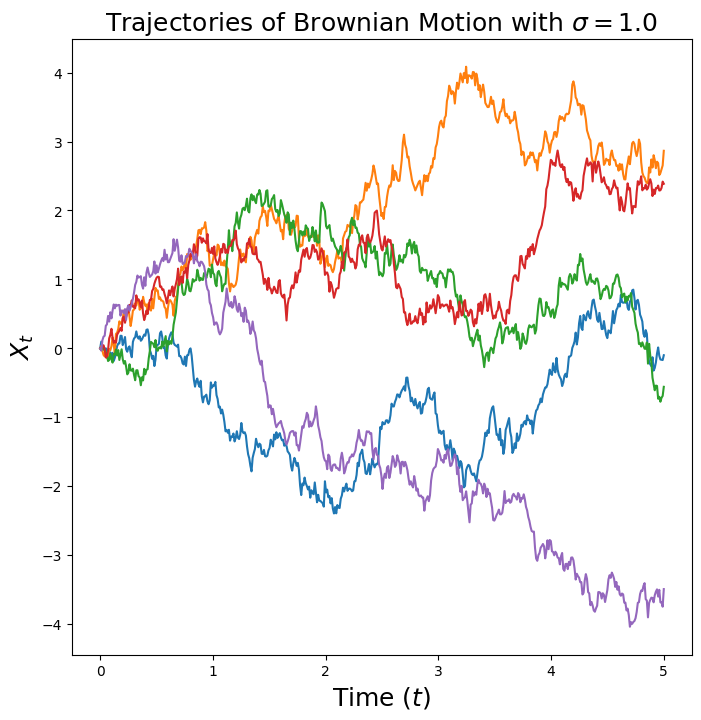

In [12]:
sigma = 1.0
brownian_motion = BrownianMotion(sigma)
simulator = EulerMaruyamaSimulator(sde=brownian_motion)
x0 = torch.zeros(5,1).to(device) # Initial values - let's start at zero
ts = torch.linspace(0.0,5.0,500).to(device) # simulation timesteps

plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_title(r'Trajectories of Brownian Motion with $\sigma=$' + str(sigma), fontsize=18)
ax.set_xlabel(r'Time ($t$)', fontsize=18)
ax.set_ylabel(r'$X_t$', fontsize=18)
plot_trajectories_1d(x0, simulator, ts, ax)
plt.show()

### Smaller the sigma the less randomness motion and vise versa 

### Ornstein-Uhlenbeck Process

An OU process is given by setting $u_t(X_t) = - \theta X_t$ and $\sigma_t = \sigma$, viz.,
$$ dX_t = -\theta X_t\, dt + \sigma\, dW_t, \quad \quad X_0 = x_0.$$

### Ornstein-Uhlenbeck Process

The **Ornstein-Uhlenbeck (OU) process** is a type of **mean-reverting** stochastic process, which means that it tends to return to a long-term mean or equilibrium over time. It is widely used in modeling systems where the values fluctuate around a constant mean and have some degree of randomness while being "pulled" back to the mean over time.

Mathematically, the OU process is defined by the following Stochastic Differential Equation (SDE):

$$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t
$$

where:
- $X_t$ is the state of the process at time $t$,
- $\theta$ is the rate at which the process reverts to the mean (mean reversion speed),
- $\mu$ is the long-term mean to which the process reverts,
- $\sigma$ is the volatility (diffusion term) of the process,
- $W_t$ is a Wiener process or Brownian motion.

### Key Features of the OU Process:
- **Mean Reversion**: The process has a tendency to move towards a long-term mean $\mu$. If the value of the process is far from $\mu$, the process will experience a stronger pull back to it. The strength of this pull is governed by the parameter $\theta$.
- **Noise**: The process also includes randomness due to the term $\sigma dW_t$, where $dW_t$ represents random shocks that affect the process.

### Real-World Example: Interest Rates

One common real-world example of the Ornstein-Uhlenbeck process is modeling **interest rates** in finance. Interest rates tend to fluctuate around a long-term mean value, and this mean-reverting property is often modeled using the OU process.

For instance, central banks typically adjust interest rates based on economic conditions to maintain a certain target range. However, the rates do not move arbitrarily; they fluctuate around a target or natural rate, such as the long-term real interest rate. The movement of these rates can be captured well by the OU process:

- $\mu$: The long-term equilibrium interest rate that the central bank aims to stabilize.
- $\theta$: The speed of reversion to the target interest rate. If the rate deviates from the long-term mean, it will be "pulled" back toward it at a rate determined by $\theta$.
- $\sigma$: The volatility or randomness in the interest rate, which can arise from unforeseen economic shocks or policy changes.
  
#### How It Works in Practice:
If the current interest rate is much higher than the long-term mean, the OU process suggests that the rate will likely decrease over time (mean reversion). Similarly, if the rate is much lower than the long-term mean, it will tend to increase.

For example, if the interest rate is $5\%$ and the long-term mean is $2\%$, the process would tend to push the rate back toward $2\%$, but it would also experience random fluctuations due to economic events (represented by the diffusion term $\sigma$).

---

### Additional Real-World Examples:

1. **Stock Prices (with dividends)**: In some models of stock prices, especially in the context of mean-reverting stock prices or commodity prices, the Ornstein-Uhlenbeck process can model the price's tendency to revert to a mean, factoring in dividends and other economic factors.
   
2. **Physiological Processes**: The OU process is sometimes used in neuroscience to model neuron membrane potentials, which tend to return to a resting potential after a disturbance.

3. **Environmental Variables**: For example, temperature in a certain location or the level of pollution in an area could follow a mean-reverting pattern, where these values tend to revert to a natural or equilibrium level after random fluctuations due to weather, seasons, or human activities.

In summary, the Ornstein-Uhlenbeck process is a powerful tool for modeling systems where a variable fluctuates around a central equilibrium point while experiencing random noise. Its main feature is **mean reversion**, making it useful in various real-world applications, particularly in finance and environmental sciences.


### Ornstein-Uhlenbeck Process: Step-by-Step Example

We will simulate the **Ornstein-Uhlenbeck** process for **3 steps** using the **Euler-Maruyama scheme**. 

#### Parameters:
- $ \theta = 0.7 $ (rate of mean reversion),
- $ \mu = 1 $ (long-term mean),
- $ \sigma = 0.2 $ (volatility),
- $ X_0 = 0 $ (initial value),
- $ \Delta t = 0.1 $ (time step).

The **Euler-Maruyama update** formula is:

$$
X_{t+\Delta t} = X_t + \theta (\mu - X_t) \Delta t + \sigma \sqrt{\Delta t} \cdot Z_t
$$

Where:
- $ Z_t \sim \mathcal{N}(0, 1) $ is a random variable from the standard normal distribution.

### Step-by-Step Simulation:

#### Step 1: Initialization
We start with $ X_0 = 0 $.

#### Step 2: First Step (At $ t = 0.1 $)

We apply the formula to calculate $ X_1 $:

$$
X_1 = X_0 + \theta (\mu - X_0) \Delta t + \sigma \sqrt{\Delta t} \cdot Z_0
$$

Substituting the values:

$$
X_1 = 0 + 0.7 \cdot (1 - 0) \cdot 0.1 + 0.2 \cdot \sqrt{0.1} \cdot 0.5
$$

Calculating each term:

- $ 0.7 \cdot (1 - 0) \cdot 0.1 = 0.07 $,
- $ 0.2 \cdot \sqrt{0.1} \cdot 0.5 \approx 0.0316 $.

Thus:

$$
X_1 \approx 0 + 0.07 + 0.0316 = 0.1016
$$

So, the value of the process at $ t = 0.1 $ is approximately **0.1016**.

#### Step 3: Second Step (At $ t = 0.2 $)

Now, we calculate $ X_2 $ using $ X_1 = 0.1016 $:

$$
X_2 = X_1 + \theta (\mu - X_1) \Delta t + \sigma \sqrt{\Delta t} \cdot Z_1
$$

Substituting the values:

$$
X_2 = 0.1016 + 0.7 \cdot (1 - 0.1016) \cdot 0.1 + 0.2 \cdot \sqrt{0.1} \cdot (-0.2)
$$

Calculating each term:

- $ 0.7 \cdot (1 - 0.1016) \cdot 0.1 = 0.062888 $,
- $ 0.2 \cdot \sqrt{0.1} \cdot (-0.2) = -0.01264 $.

Thus:

$$
X_2 \approx 0.1016 + 0.062888 - 0.01264 = 0.151848
$$

So, the value of the process at $ t = 0.2 $ is approximately **0.1518**.

#### Step 4: Third Step (At $ t = 0.3 $)

Now, we calculate $ X_3 $ using $ X_2 = 0.1518 $:

$$
X_3 = X_2 + \theta (\mu - X_2) \Delta t + \sigma \sqrt{\Delta t} \cdot Z_2
$$

Substituting the values:

$$
X_3 = 0.1518 + 0.7 \cdot (1 - 0.1518) \cdot 0.1 + 0.2 \cdot \sqrt{0.1} \cdot 1.2
$$

Calculating each term:

- $ 0.7 \cdot (1 - 0.1518) \cdot 0.1 = 0.059374 $,
- $ 0.2 \cdot \sqrt{0.1} \cdot 1.2 = 0.075456 $.

Thus:

$$
X_3 \approx 0.1518 + 0.059374 + 0.075456 = 0.28663
$$

So, the value of the process at $ t = 0.3 $ is approximately **0.2866**.

### Summary of Results:
- **At $ t = 0.0 $**, $ X_0 = 0 $,
- **At $ t = 0.1 $**, $ X_1 \approx 0.1016 $,
- **At $ t = 0.2 $**, $ X_2 \approx 0.1518 $,
- **At $ t = 0.3 $**, $ X_3 \approx 0.2866 $.

This demonstrates the **mean-reverting** behavior of the Ornstein-Uhlenbeck process. The process fluctuates around the mean $ \mu = 1 $, with random noise introduced by the Wiener process.


In [13]:
class OUProcess(SDE):
    def __init__(self, theta: float, sigma: float):
        self.theta = theta
        self.sigma = sigma

    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - drift: shape (bs, dim)
        """
        return -self.theta * xt

    def diffusion_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the diffusion coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - diffusion: shape (bs, dim)
        """
        return self.sigma * torch.ones_like(xt)

100%|████████████████████████████████████████| 999/999 [00:00<00:00, 46841.99it/s]


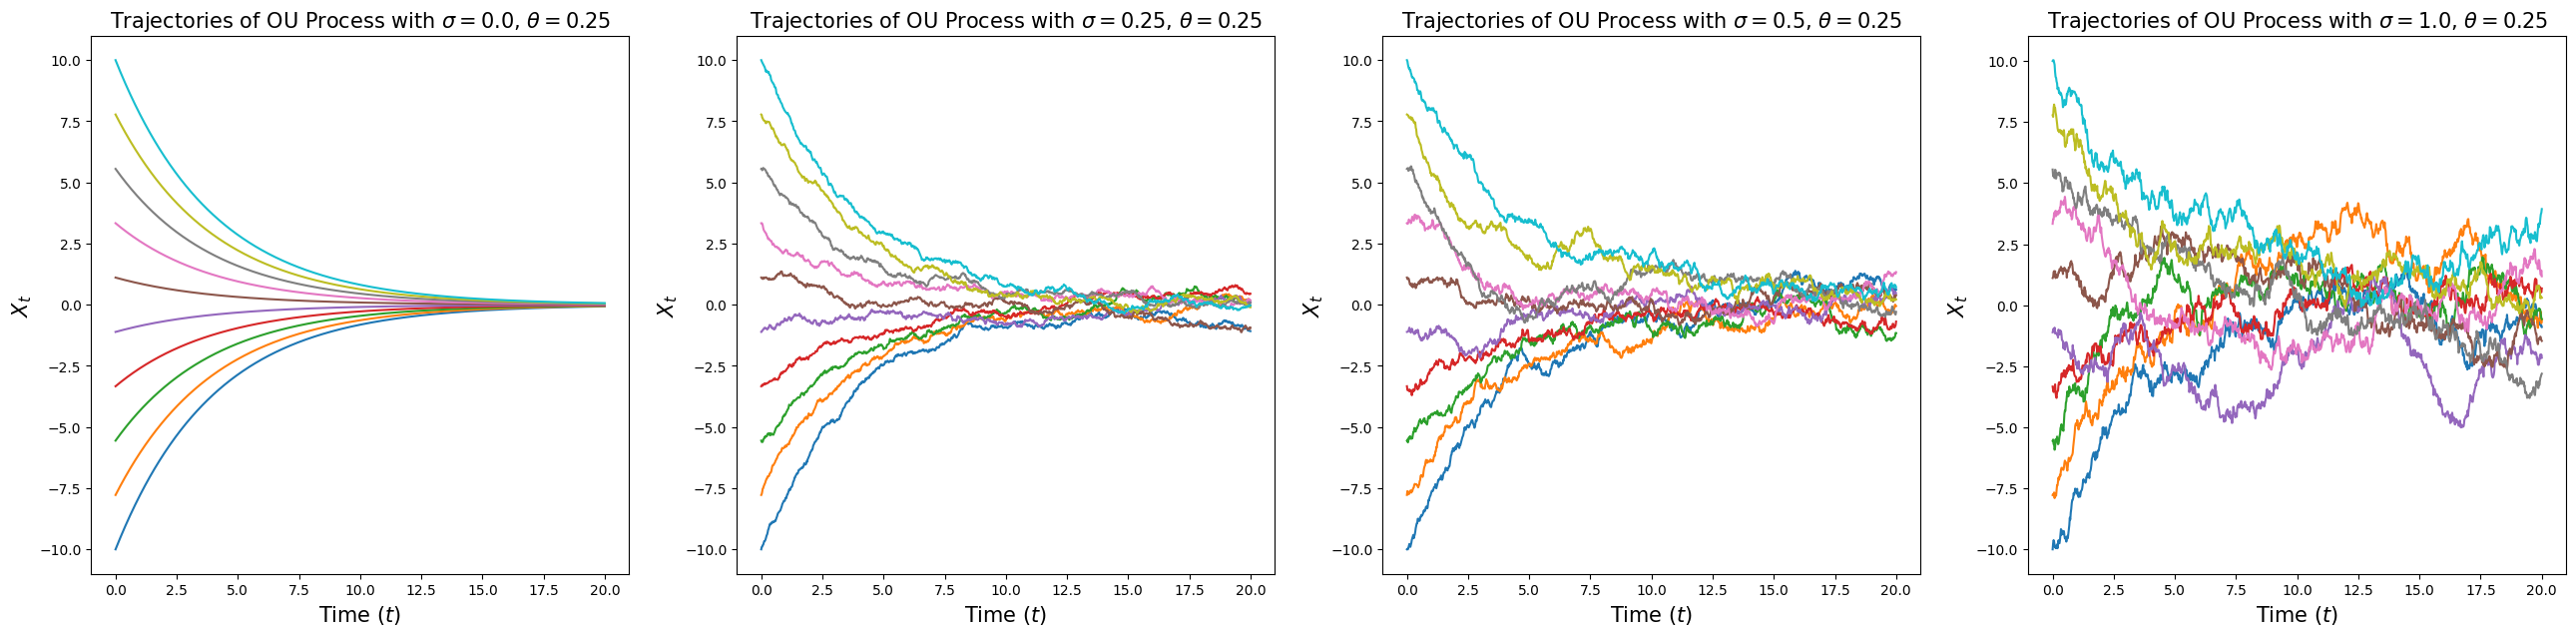

In [14]:
# Try comparing multiple choices side-by-side
thetas_and_sigmas = [
    (0.25, 0.0),
    (0.25, 0.25),
    (0.25, 0.5),
    (0.25, 1.0),
]
simulation_time = 20.0

num_plots = len(thetas_and_sigmas)
fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 7))

for idx, (theta, sigma) in enumerate(thetas_and_sigmas):
    ou_process = OUProcess(theta, sigma)
    simulator = EulerMaruyamaSimulator(sde=ou_process)
    x0 = torch.linspace(-10.0,10.0,10).view(-1,1).to(device) # Initial values - let's start at zero
    ts = torch.linspace(0.0,simulation_time,1000).to(device) # simulation timesteps

    ax = axes[idx]
    ax.set_title(f'Trajectories of OU Process with $\\sigma = ${sigma}, $\\theta = ${theta}', fontsize=15)
    ax.set_xlabel(r'Time ($t$)', fontsize=15)
    ax.set_ylabel(r'$X_t$', fontsize=15)
    plot_trajectories_1d(x0, simulator, ts, ax)
plt.show()

In [15]:
def plot_scaled_trajectories_1d(x0: torch.Tensor, simulator: Simulator, timesteps: torch.Tensor, time_scale: float, label: str, ax: Optional[Axes] = None):
        """
        Graphs the trajectories of a one-dimensional SDE with given initial values (x0) and simulation timesteps (timesteps).
        Args:
            - x0: state at time t, shape (num_trajectories, 1)
            - simulator: Simulator object used to simulate
            - t: timesteps to simulate along, shape (num_timesteps,)
            - time_scale: scalar by which to scale time
            - label: self-explanatory
            - ax: pyplot Axes object to plot on
        """
        if ax is None:
            print('moo')
            ax = plt.gca()
        trajectories = simulator.simulate_with_trajectory(x0, timesteps) # (num_trajectories, num_timesteps, ...)
        for trajectory_idx in range(trajectories.shape[0]):
            trajectory = trajectories[trajectory_idx, :, 0] # (num_timesteps,)
            ax.plot(ts.cpu() * time_scale, trajectory.cpu(), label=label)

100%|████████████████████████████████████████| 999/999 [00:00<00:00, 46956.95it/s]


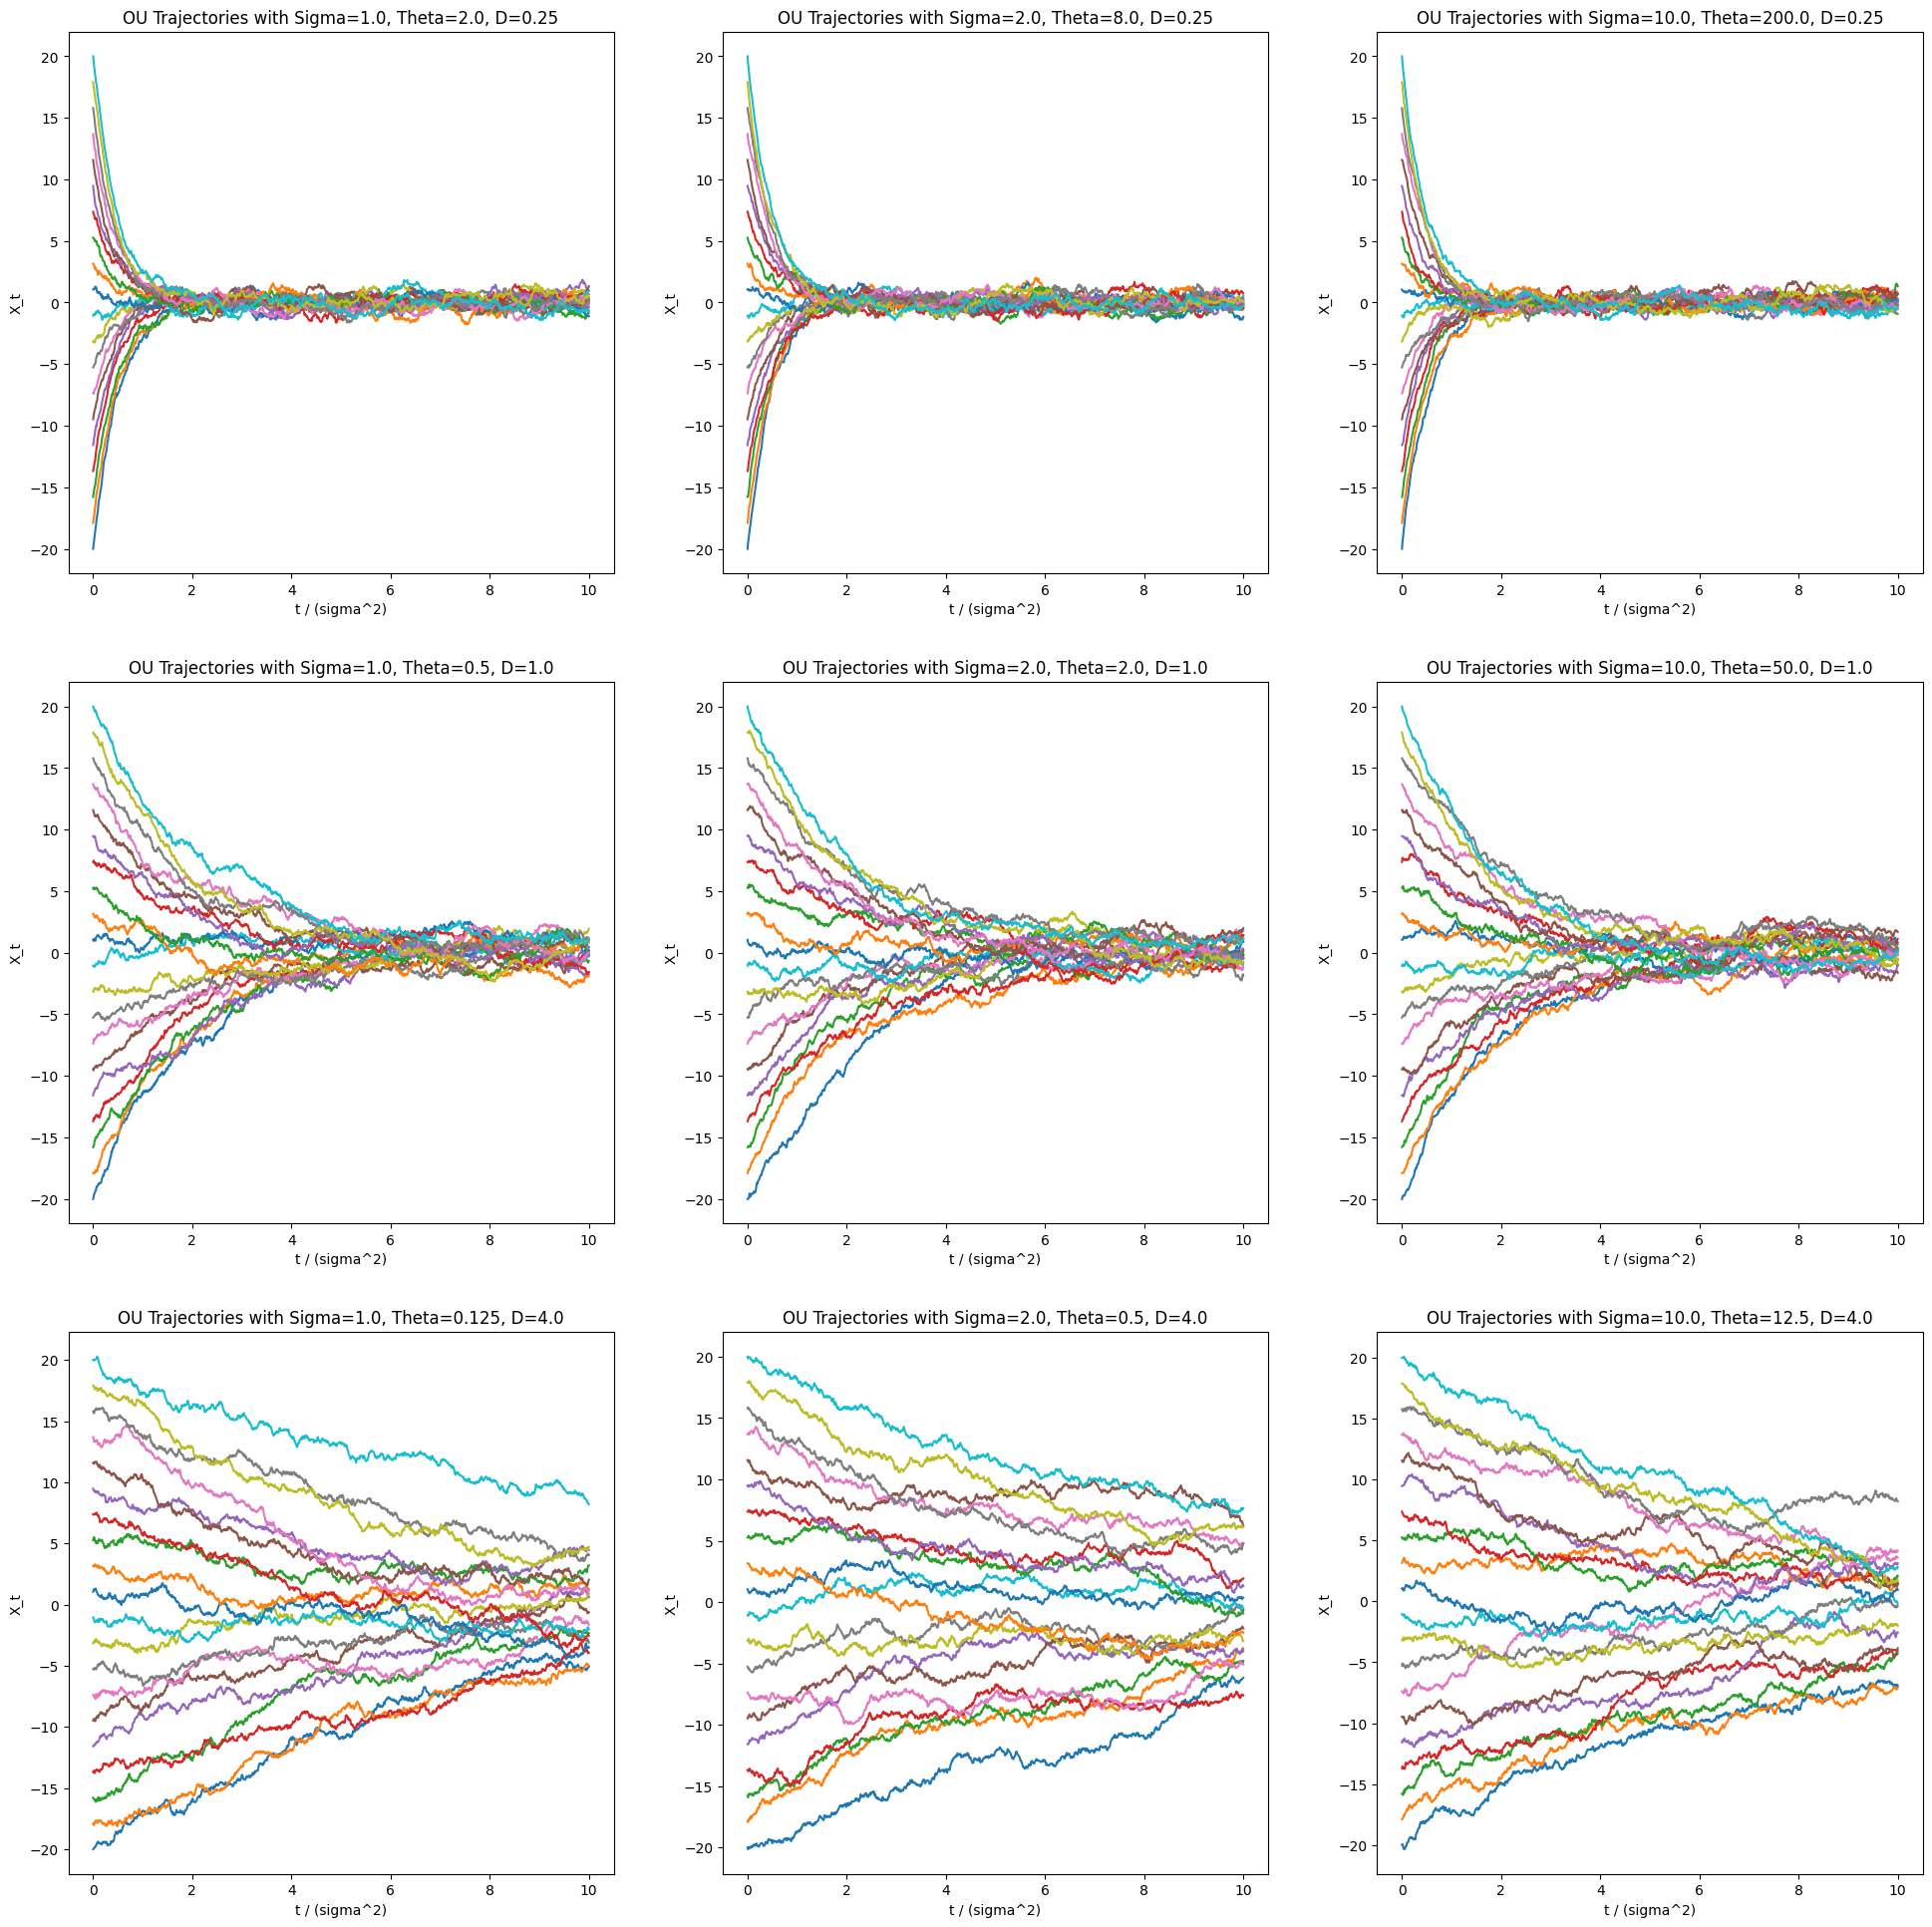

In [16]:
# Let's try rescaling with time
sigmas = [1.0, 2.0, 10.0]
ds = [0.25, 1.0, 4.0] # sigma**2 / 2t
simulation_time = 10.0

fig, axes = plt.subplots(len(ds), len(sigmas), figsize=(8 * len(sigmas), 8 * len(ds)))
axes = axes.reshape((len(ds), len(sigmas)))
for d_idx, d in enumerate(ds):
    for s_idx, sigma in enumerate(sigmas):
        theta = sigma**2 / 2 / d
        ou_process = OUProcess(theta, sigma)
        simulator = EulerMaruyamaSimulator(sde=ou_process)
        x0 = torch.linspace(-20.0,20.0,20).view(-1,1).to(device)
        time_scale = sigma**2
        ts = torch.linspace(0.0,simulation_time / time_scale,1000).to(device) # simulation timesteps
        ax = axes[d_idx, s_idx]
        plot_scaled_trajectories_1d(x0=x0, simulator=simulator, timesteps=ts, time_scale=time_scale, label=f'Sigma = {sigma}', ax=ax)
        ax.set_title(f'OU Trajectories with Sigma={sigma}, Theta={theta}, D={d}')
        ax.set_xlabel(f't / (sigma^2)')
        ax.set_ylabel('X_t')
plt.show()

Every ODE is also an SDE - simply with a vanishing diffusion coefficient σt = 0

## Transforming Distributions with SDEs

we observed how individual points are transformed by an SDE. Ultimately, we are interested in understanding how distributions are transformed by an SDE (or an ODE...)

### Langevin dynamics

A family of SDEs which "drive" samples toward the distribution  𝜋

Langevin dynamics is a mathematical framework used to describe the motion of a particle in a fluid while subject to both deterministic forces and stochastic (random) forces. It is widely used in statistical physics, molecular dynamics, and machine learning (e.g., Langevin-based optimization methods).

Langevin dynamics balances deterministic motion (due to forces) with random fluctuations (due to a heat bath). It is a more physically realistic model than purely deterministic Newtonian dynamics, especially in systems where thermal noise plays a role.

In [17]:
class Density(ABC):
    """
    Distribution with tractable density
    """
    @abstractmethod
    def log_density(self, x: torch.Tensor) -> torch.Tensor:
        """
        Returns the log density at x.
        Args:
            - x: shape (batch_size, dim)
        Returns:
            - log_density: shape (batch_size, 1)
        """
        pass

    def score(self, x: torch.Tensor) -> torch.Tensor:
        """
        Returns the score dx log density(x)
        Args:
            - x: (batch_size, dim)
        Returns:
            - score: (batch_size, dim)
        """
        x = x.unsqueeze(1)  # (batch_size, 1, ...)
        score = vmap(jacrev(self.log_density))(x)  # (batch_size, 1, 1, 1, ...)
        return score.squeeze((1, 2, 3))  # (batch_size, ...)

class Sampleable(ABC):
    """
    Distribution which can be sampled from
    """
    @abstractmethod
    def sample(self, num_samples: int) -> torch.Tensor:
        """
        Returns the log density at x.
        Args:
            - num_samples: the desired number of samples
        Returns:
            - samples: shape (batch_size, dim)
        """
        pass

In [18]:
# Several plotting utility functions
def hist2d_sampleable(sampleable: Sampleable, num_samples: int, ax: Optional[Axes] = None, **kwargs):
    if ax is None:
        ax = plt.gca()
    samples = sampleable.sample(num_samples) # (ns, 2)
    ax.hist2d(samples[:,0].cpu(), samples[:,1].cpu(), **kwargs)

def scatter_sampleable(sampleable: Sampleable, num_samples: int, ax: Optional[Axes] = None, **kwargs):
    if ax is None:
        ax = plt.gca()
    samples = sampleable.sample(num_samples) # (ns, 2)
    ax.scatter(samples[:,0].cpu(), samples[:,1].cpu(), **kwargs)

def imshow_density(density: Density, bins: int, scale: float, ax: Optional[Axes] = None, **kwargs):
    if ax is None:
        ax = plt.gca()
    x = torch.linspace(-scale, scale, bins).to(device)
    y = torch.linspace(-scale, scale, bins).to(device)
    X, Y = torch.meshgrid(x, y)
    xy = torch.stack([X.reshape(-1), Y.reshape(-1)], dim=-1)
    density = density.log_density(xy).reshape(bins, bins).T
    im = ax.imshow(density.cpu(), extent=[-scale, scale, -scale, scale], origin='lower', **kwargs)

def contour_density(density: Density, bins: int, scale: float, ax: Optional[Axes] = None, **kwargs):
    if ax is None:
        ax = plt.gca()
    x = torch.linspace(-scale, scale, bins).to(device)
    y = torch.linspace(-scale, scale, bins).to(device)
    X, Y = torch.meshgrid(x, y)
    xy = torch.stack([X.reshape(-1), Y.reshape(-1)], dim=-1)
    density = density.log_density(xy).reshape(bins, bins).T
    im = ax.contour(density.cpu(), extent=[-scale, scale, -scale, scale], origin='lower', **kwargs)

In [19]:
class Gaussian(torch.nn.Module, Sampleable, Density):
    """
    Two-dimensional Gaussian. Is a Density and a Sampleable. Wrapper around torch.distributions.MultivariateNormal
    """
    def __init__(self, mean, cov):
        """
        mean: shape (2,)
        cov: shape (2,2)
        """
        super().__init__()
        self.register_buffer("mean", mean)
        self.register_buffer("cov", cov)

    @property
    def distribution(self):
        return D.MultivariateNormal(self.mean, self.cov, validate_args=False)

    def sample(self, num_samples) -> torch.Tensor:
        return self.distribution.sample((num_samples,))

    def log_density(self, x: torch.Tensor):
        return self.distribution.log_prob(x).view(-1, 1)

class GaussianMixture(torch.nn.Module, Sampleable, Density):
    """
    Two-dimensional Gaussian mixture model, and is a Density and a Sampleable. Wrapper around torch.distributions.MixtureSameFamily.
    """
    def __init__(
        self,
        means: torch.Tensor,  # nmodes x data_dim
        covs: torch.Tensor,  # nmodes x data_dim x data_dim
        weights: torch.Tensor,  # nmodes
    ):
        """
        means: shape (nmodes, 2)
        covs: shape (nmodes, 2, 2)
        weights: shape (nmodes, 1)
        """
        super().__init__()
        self.nmodes = means.shape[0]
        self.register_buffer("means", means)
        self.register_buffer("covs", covs)
        self.register_buffer("weights", weights)

    @property
    def dim(self) -> int:
        return self.means.shape[1]

    @property
    def distribution(self):
        return D.MixtureSameFamily(
                mixture_distribution=D.Categorical(probs=self.weights, validate_args=False),
                component_distribution=D.MultivariateNormal(
                    loc=self.means,
                    covariance_matrix=self.covs,
                    validate_args=False,
                ),
                validate_args=False,
            )

    def log_density(self, x: torch.Tensor) -> torch.Tensor:
        return self.distribution.log_prob(x).view(-1, 1)

    def sample(self, num_samples: int) -> torch.Tensor:
        return self.distribution.sample(torch.Size((num_samples,)))

    @classmethod
    def random_2D(
        cls, nmodes: int, std: float, scale: float = 10.0, seed = 0.0
    ) -> "GaussianMixture":
        torch.manual_seed(seed)
        means = (torch.rand(nmodes, 2) - 0.5) * scale
        covs = torch.diag_embed(torch.ones(nmodes, 2)) * std ** 2
        weights = torch.ones(nmodes)
        return cls(means, covs, weights)

    @classmethod
    def symmetric_2D(
        cls, nmodes: int, std: float, scale: float = 10.0,
    ) -> "GaussianMixture":
        angles = torch.linspace(0, 2 * np.pi, nmodes + 1)[:nmodes]
        means = torch.stack([torch.cos(angles), torch.sin(angles)], dim=1) * scale
        covs = torch.diag_embed(torch.ones(nmodes, 2) * std ** 2)
        weights = torch.ones(nmodes) / nmodes
        return cls(means, covs, weights)

/Users/mathias/Library/Python/3.9/lib/python/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


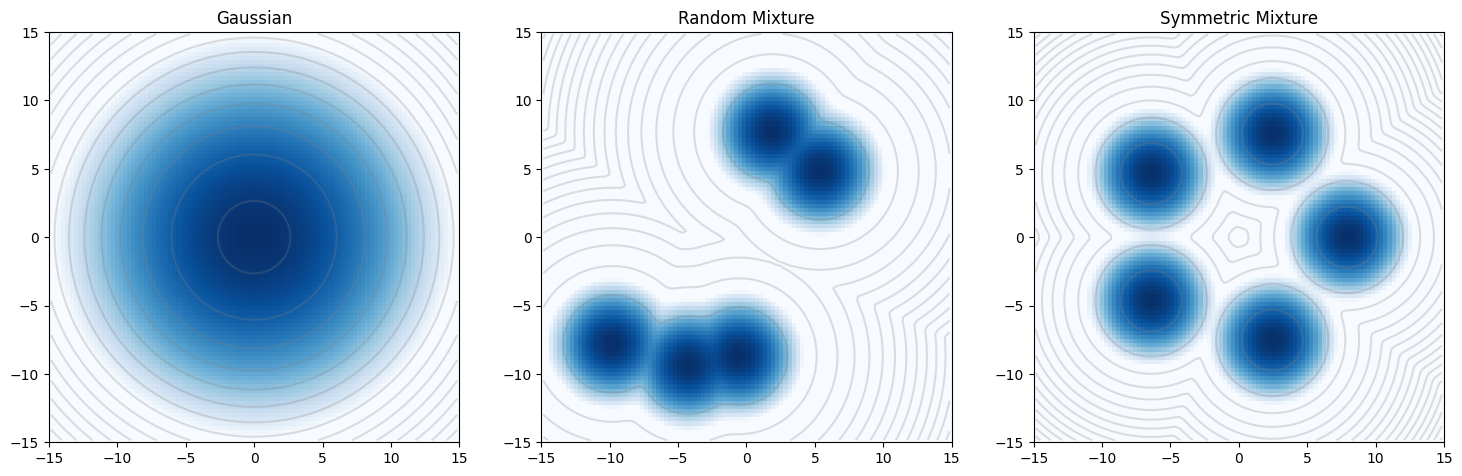

In [20]:
# Visualize densities
densities = {
    "Gaussian": Gaussian(mean=torch.zeros(2), cov=10 * torch.eye(2)).to(device),
    "Random Mixture": GaussianMixture.random_2D(nmodes=5, std=1.0, scale=20.0, seed=3.0).to(device),
    "Symmetric Mixture": GaussianMixture.symmetric_2D(nmodes=5, std=1.0, scale=8.0).to(device),
}

fig, axes = plt.subplots(1,3, figsize=(18, 6))
bins = 100
scale = 15
for idx, (name, density) in enumerate(densities.items()):
    ax = axes[idx]
    ax.set_title(name)
    imshow_density(density, bins, scale, ax, vmin=-15, cmap=plt.get_cmap('Blues'))
    contour_density(density, bins, scale, ax, colors='grey', linestyles='solid', alpha=0.25, levels=20)
plt.show()

Simulate the (overdamped) Langevin dynamics $$dX_t = \frac{1}{2} \sigma^2\nabla \log p(X_t) dt + \sigma dW_t.$$


In [21]:
class LangevinSDE(SDE):
    def __init__(self, sigma: float, density: Density):
        self.sigma = sigma
        self.density = density

    def drift_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the drift coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - drift: shape (bs, dim)
        """
        return 0.5 * self.sigma ** 2 * self.density.score(xt)

    def diffusion_coefficient(self, xt: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Returns the diffusion coefficient of the ODE.
        Args:
            - xt: state at time t, shape (bs, dim)
            - t: time, shape ()
        Returns:
            - diffusion: shape (bs, dim)
        """
        return self.sigma * torch.ones_like(xt)

In [22]:
# two utility functions...
def every_nth_index(num_timesteps: int, n: int) -> torch.Tensor:
    """
    Compute the indices to record in the trajectory
    """
    if n == 1:
        return torch.arange(num_timesteps)
    return torch.cat(
        [
            torch.arange(0, num_timesteps - 1, n),
            torch.tensor([num_timesteps - 1]),
        ]
    )

def graph_dynamics(
    num_samples: int,
    source_distribution: Sampleable,
    simulator: Simulator,
    density: Density,
    timesteps: torch.Tensor,
    plot_every: int,
    bins: int,
    scale: float
):
    """
    Plot the evolution of samples from source under the simulation scheme given by simulator (itself a discretization of an ODE or SDE).
    Args:
        - num_samples: the number of samples to simulate
        - source_distribution: distribution from which we draw initial samples at t=0
        - simulator: the discertized simulation scheme used to simulate the dynamics
        - density: the target density
        - timesteps: the timesteps used by the simulator
        - plot_every: number of timesteps between consecutive plots
        - bins: number of bins for imshow
        - scale: scale for imshow
    """
    # Simulate
    x0 = source_distribution.sample(num_samples)
    xts = simulator.simulate_with_trajectory(x0, timesteps)
    indices_to_plot = every_nth_index(len(timesteps), plot_every)
    plot_timesteps = timesteps[indices_to_plot]
    plot_xts = xts[:,indices_to_plot]

    # Graph
    fig, axes = plt.subplots(2, len(plot_timesteps), figsize=(8*len(plot_timesteps), 16))
    axes = axes.reshape((2,len(plot_timesteps)))
    for t_idx in range(len(plot_timesteps)):
        t = plot_timesteps[t_idx].item()
        xt = xts[:,t_idx]
        # Scatter axes
        scatter_ax = axes[0, t_idx]
        imshow_density(density, bins, scale, scatter_ax, vmin=-15, alpha=0.25, cmap=plt.get_cmap('Blues'))
        scatter_ax.scatter(xt[:,0].cpu(), xt[:,1].cpu(), marker='x', color='black', alpha=0.75, s=15)
        scatter_ax.set_title(f'Samples at t={t:.1f}', fontsize=15)
        scatter_ax.set_xticks([])
        scatter_ax.set_yticks([])

        # Kdeplot axes
        kdeplot_ax = axes[1, t_idx]
        imshow_density(density, bins, scale, kdeplot_ax, vmin=-15, alpha=0.5, cmap=plt.get_cmap('Blues'))
        sns.kdeplot(x=xt[:,0].cpu(), y=xt[:,1].cpu(), alpha=0.5, ax=kdeplot_ax,color='grey')
        kdeplot_ax.set_title(f'Density of Samples at t={t:.1f}', fontsize=15)
        kdeplot_ax.set_xticks([])
        kdeplot_ax.set_yticks([])
        kdeplot_ax.set_xlabel("")
        kdeplot_ax.set_ylabel("")

    plt.show()

100%|██████████████████████████████████████████| 999/999 [00:01<00:00, 769.02it/s]


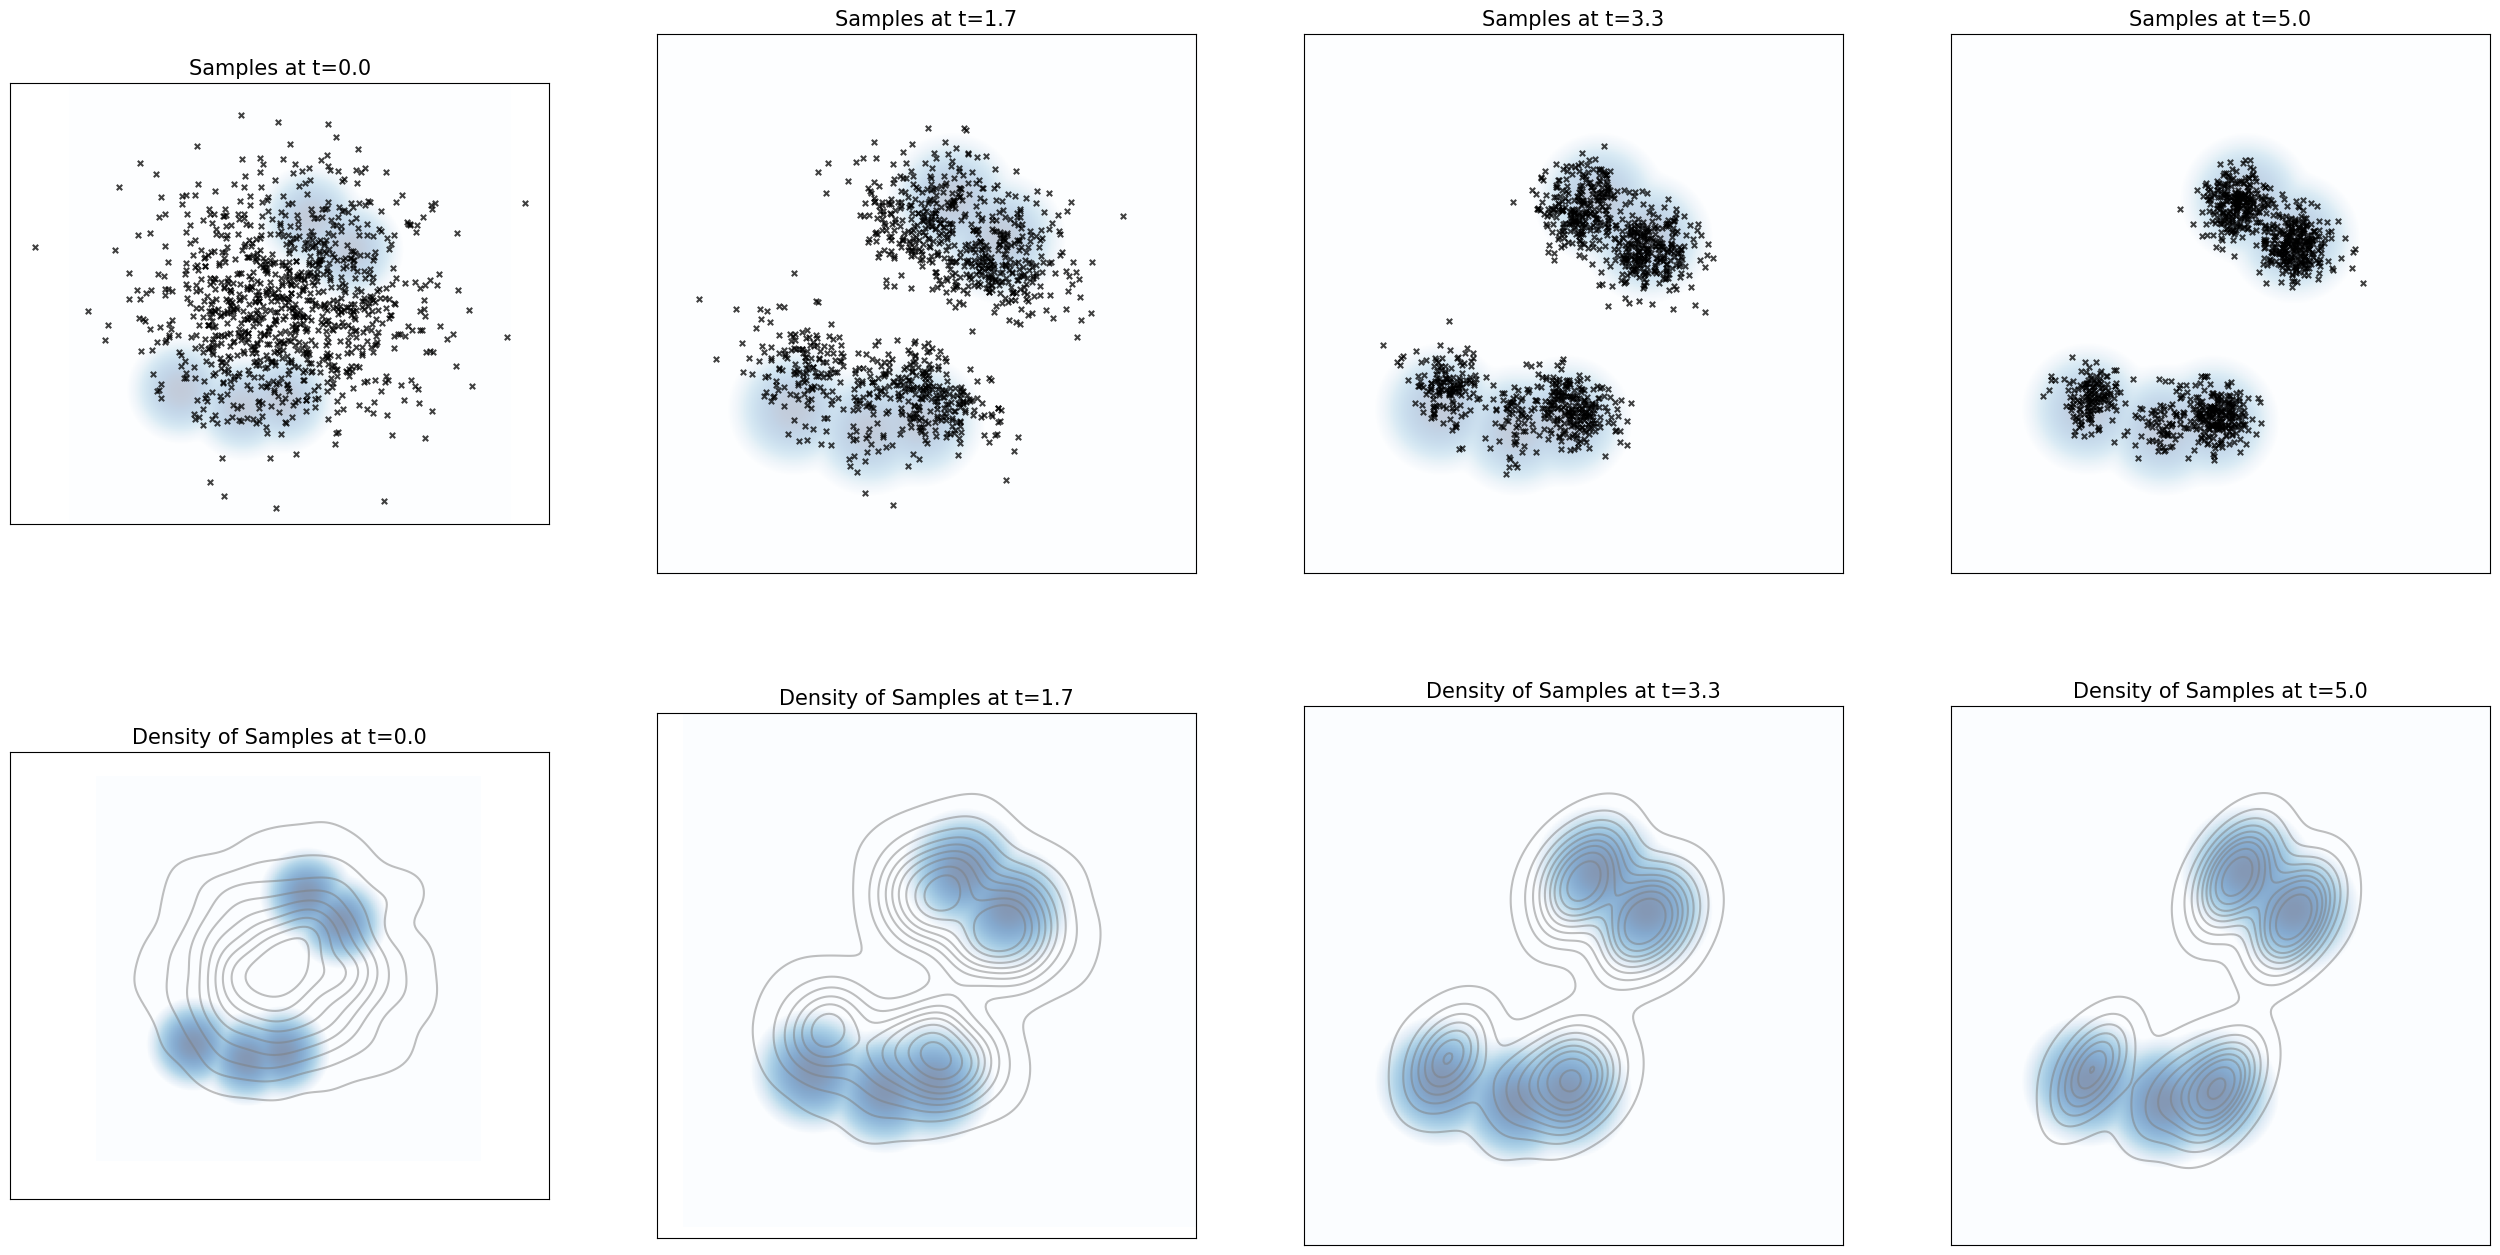

In [23]:
# Construct the simulator
target = GaussianMixture.random_2D(nmodes=5, std=0.75, scale=15.0, seed=3.0).to(device)
sde = LangevinSDE(sigma = 10.0, density = target)
simulator = EulerMaruyamaSimulator(sde)

# Graph the results!
graph_dynamics(
    num_samples = 1000,
    source_distribution = Gaussian(mean=torch.zeros(2), cov=20 * torch.eye(2)).to(device),
    simulator=simulator,
    density=target,
    timesteps=torch.linspace(0,5.0,1000).to(device),
    plot_every=334,
    bins=200,
    scale=15
)

In [24]:
!pip install ffmpeg

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [25]:
from celluloid import Camera
from IPython.display import HTML

In [26]:
def animate_dynamics(
    num_samples: int,
    source_distribution: Sampleable,
    simulator: Simulator,
    density: Density,
    timesteps: torch.Tensor,
    animate_every: int,
    bins: int,
    scale: float,
    save_path: str = 'dynamics_animation.mp4'
):
    """
    Plot the evolution of samples from source under the simulation scheme given by simulator (itself a discretization of an ODE or SDE).
    Args:
        - num_samples: the number of samples to simulate
        - source_distribution: distribution from which we draw initial samples at t=0
        - simulator: the discertized simulation scheme used to simulate the dynamics
        - density: the target density
        - timesteps: the timesteps used by the simulator
        - animate_every: number of timesteps between consecutive frames in the resulting animation
    """
    # Simulate
    x0 = source_distribution.sample(num_samples)
    xts = simulator.simulate_with_trajectory(x0, timesteps)
    indices_to_animate = every_nth_index(len(timesteps), animate_every)
    animate_timesteps = timesteps[indices_to_animate]

    # Graph
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    camera = Camera(fig)
    for t_idx in range(len(animate_timesteps)):
        t = animate_timesteps[t_idx].item()
        xt = xts[:,t_idx]
        # Scatter axes
        scatter_ax = axes[0]
        imshow_density(density, bins, scale, scatter_ax, vmin=-15, alpha=0.25, cmap=plt.get_cmap('Blues'))
        scatter_ax.scatter(xt[:,0].cpu(), xt[:,1].cpu(), marker='x', color='black', alpha=0.75, s=15)
        scatter_ax.set_title(f'Samples')

        # Kdeplot axes
        kdeplot_ax = axes[1]
        imshow_density(density, bins, scale, kdeplot_ax, vmin=-15, alpha=0.5, cmap=plt.get_cmap('Blues'))
        sns.kdeplot(x=xt[:,0].cpu(), y=xt[:,1].cpu(), alpha=0.5, ax=kdeplot_ax,color='grey')
        kdeplot_ax.set_title(f'Density of Samples', fontsize=15)
        kdeplot_ax.set_xticks([])
        kdeplot_ax.set_yticks([])
        kdeplot_ax.set_xlabel("")
        kdeplot_ax.set_ylabel("")
        camera.snap()

    animation = camera.animate()
    animation.save(save_path)
    plt.close()
    return HTML(animation.to_html5_video())

In [27]:
!pip install "imageio[ffmpeg]"

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [28]:
# OPTIONAL CELL
# Construct the simulator
target = GaussianMixture.random_2D(nmodes=5, std=0.75, scale=15.0, seed=3.0).to(device)
sde = LangevinSDE(sigma = 10.0, density = target)
simulator = EulerMaruyamaSimulator(sde)

# Graph the results!
animate_dynamics(
    num_samples = 1000,
    source_distribution = Gaussian(mean=torch.zeros(2), cov=20 * torch.eye(2)).to(device),
    simulator=simulator,
    density=target,
    timesteps=torch.linspace(0,1.5,1000).to(device),
    bins=200,
    scale=15,
    animate_every=100
)

100%|██████████████████████████████████████████| 999/999 [00:01<00:00, 822.77it/s]


### Ornstein-Uhlenbeck as Langevin Dynamics

connecting Langevin dynamics and Ornstein-Uhlenbeck processes. Recall that for (suitably nice) distribution $p$, the *Langevin dynamics* are given by
$$dX_t = \frac{1}{2} \sigma^2\nabla \log p(X_t) dt + \sigma\, dW_t, \quad \quad X_0 = x_0,$$
while for given $\theta, \sigma$, the Ornstein-Uhlenbeck process is given by
$$dX_t = -\theta X_t\, dt + \sigma\, dW_t, \quad \quad X_0 = x_0.$$

**Your job**: Show that when $p(x) = N(0, \frac{\sigma^2}{2\theta})$, the score is given by $$\nabla \log p(x) = -\frac{2\theta}{\sigma^2}x.$$

**Hint**: The probability density of the Gaussian $p(x) = N(0, \frac{\sigma^2}{2\theta})$ is given by $$p(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2\theta}{\sigma^2}\right).$$

In [45]:
from collections import Counter

def most_freq_char(s):
    counter = Counter(s)
    # print(counter)
    return max(counter, key=lambda c: counter[c])

print(most_freq_char("banana"))

a
